In [ ]:
# Import pakages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import statsmodels.api as sm

## 1. Clustering anaysis

### 1-1. Clustering based on crime Composition

In [ ]:
# Import monthly data from Dec 2023 to Nov 2025
crime_long = pd.read_csv("Data/crime_population.csv")
crime_long.head(1)

,date,year,month,BoroughName,crime_category,crime_subcategory,crime_count,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,ALCOHOLIC BEVERAGES AND TOBACCO,...,MISCELLANEOUS GOODS AND SERVICES,earnings,active_enterprises,births,birth_rate,deaths,death_rate,Rate,unemployment_rate,population
0,2010-04-01,2010,4,Barking and Dagenham,ARSON AND CRIMINAL DAMAGE,ARSON,6,89.886,90.362,77.143,...,94.064,429.3,4190.0,635.0,15.2,585.0,14.0,0.5,13.1,185911.0


In [ ]:
df_pivot = (
    crime_long.pivot_table(
        index=['BoroughName', 'year'],
        columns='crime_category',
        values='crime_count',
        aggfunc='sum',
        fill_value=0
    )
    .reset_index())

df_share = df_pivot.copy()

crime_cols = df_share.columns.difference(['BoroughName', 'year'])
df_share[crime_cols] = df_share[crime_cols].div(
    df_share[crime_cols].sum(axis=1),
    axis=0
)

In [27]:
df_share

crime_category,BoroughName,year,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,Barking and Dagenham,2010,0.125773,0.112634,0.056352,0.032111,0.010329,0.007167,0.020658,0.043283,0.011242,0.210090,0.154300,0.216062
1,Barking and Dagenham,2011,0.116633,0.128713,0.053649,0.032123,0.009225,0.005930,0.020921,0.054747,0.013508,0.209269,0.159794,0.195486
2,Barking and Dagenham,2012,0.099254,0.144735,0.056674,0.042402,0.007936,0.004856,0.026176,0.043409,0.013976,0.217577,0.148229,0.194777
3,Barking and Dagenham,2013,0.097294,0.138538,0.068367,0.003484,0.012504,0.004603,0.034650,0.032535,0.016485,0.210140,0.171011,0.210389
4,Barking and Dagenham,2014,0.101679,0.120304,0.051505,0.000000,0.015774,0.004308,0.047070,0.031232,0.021033,0.206842,0.126639,0.273614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Westminster,2021,0.045051,0.046507,0.059507,0.000000,0.007095,0.006664,0.065311,0.043616,0.024976,0.430250,0.069576,0.201448
508,Westminster,2022,0.029535,0.037595,0.047120,0.000000,0.005076,0.005475,0.045069,0.042364,0.019211,0.569841,0.054008,0.144705
509,Westminster,2023,0.025881,0.034905,0.030137,0.000000,0.004390,0.005192,0.041445,0.046079,0.015475,0.621850,0.048497,0.126150
510,Westminster,2024,0.026298,0.033440,0.024608,0.000033,0.003609,0.003249,0.038303,0.040919,0.016224,0.648288,0.046589,0.118440


In [ ]:
corr = df_share.iloc[:, 2:].corr()
red_green_cmap = sns.diverging_palette(10, 130, s=90, l=55, center='light', as_cmap=True)
masking = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.figure(figsize=(12, 10))
plt.tight_layout()
plt.title("Correlation of crime composition")
sns.heatmap(
    data=corr,
    mask=masking,
    vmin=-1,
    vmax=1,
    cmap=red_green_cmap,  # Use our custom colormap
    center=0,             # Anchor the colormap at 0 (making it white)
    annot=True,           # Show the values in the cells
    fmt=".2f",            # Format the values to one decimal place
    linewidths=.5,        # Add thin lines between cells
    cbar_kws={"label": "Value"} # Label for the color bar
)
plt.show()

In [ ]:
scaler = StandardScaler()

# Exclude categorical variables
columns_to_exclude = ['BoroughName', 'year']
columns_to_scale = df_share.columns.difference(columns_to_exclude)
df_share_scaled = df_share.copy()
df_share_scaled[columns_to_scale] = scaler.fit_transform(df_share_scaled[columns_to_scale])
df_share_scaled.head()

crime_category,BoroughName,year,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,Barking and Dagenham,2010,2.307400,0.588878,-0.059678,2.176186,-0.423607,0.041646,-1.813522,0.668803,-1.495227,-0.671864,0.813438,-0.465036
1,Barking and Dagenham,2011,1.864078,1.087477,-0.207932,2.177234,-0.604967,-0.545429,-1.798525,1.549782,-1.155581,-0.681925,0.989417,-0.822627
2,Barking and Dagenham,2012,1.021146,1.584277,-0.042001,3.025730,-0.816889,-1.055548,-1.499758,0.678485,-1.085471,-0.580101,0.618959,-0.834958
3,Barking and Dagenham,2013,0.926086,1.392117,0.599334,-0.186984,-0.066185,-1.175517,-1.017865,-0.157106,-0.709388,-0.671251,1.348763,-0.563636
4,Barking and Dagenham,2014,1.138766,0.826724,-0.325544,-0.474562,0.471264,-1.315837,-0.311624,-0.257221,-0.027802,-0.711674,-0.072676,0.535153


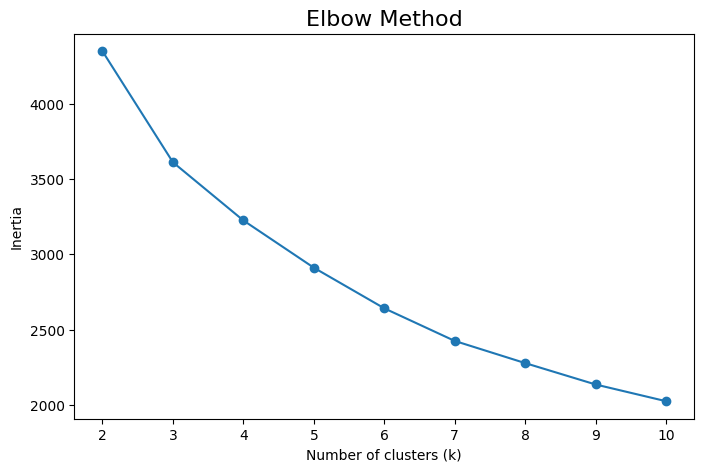

In [ ]:
# Selet K using elbow method
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    km.fit(df_share_scaled.iloc[:, 2:])
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method", fontsize = 16)
plt.show()

In [ ]:
# KMeans
X = df_share_scaled.iloc[:, 2:]

km = KMeans(n_clusters=3, random_state=42, n_init=10)
df_share_scaled["label_KMeans"] = km.fit_predict(X)

df_share_scaled

crime_category,BoroughName,year,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON,label_KMeans
0,Barking and Dagenham,2010,2.307400,0.588878,-0.059678,2.176186,-0.423607,0.041646,-1.813522,0.668803,-1.495227,-0.671864,0.813438,-0.465036,0
1,Barking and Dagenham,2011,1.864078,1.087477,-0.207932,2.177234,-0.604967,-0.545429,-1.798525,1.549782,-1.155581,-0.681925,0.989417,-0.822627,0
2,Barking and Dagenham,2012,1.021146,1.584277,-0.042001,3.025730,-0.816889,-1.055548,-1.499758,0.678485,-1.085471,-0.580101,0.618959,-0.834958,0
3,Barking and Dagenham,2013,0.926086,1.392117,0.599334,-0.186984,-0.066185,-1.175517,-1.017865,-0.157106,-0.709388,-0.671251,1.348763,-0.563636,0
4,Barking and Dagenham,2014,1.138766,0.826724,-0.325544,-0.474562,0.471264,-1.315837,-0.311624,-0.257221,-0.027802,-0.711674,-0.072676,0.535153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Westminster,2021,-1.607852,-1.461551,0.113400,-0.474562,-0.955024,-0.196991,0.725598,0.694378,0.563235,2.026564,-1.900695,-0.719023,2
508,Westminster,2022,-2.360413,-1.737884,-0.566008,-0.474562,-1.286840,-0.761501,-0.425419,0.598234,-0.300907,3.737489,-2.399406,-1.705149,2
509,Westminster,2023,-2.537666,-1.821298,-1.497544,-0.474562,-1.399595,-0.896184,-0.631495,0.883716,-0.860814,4.374940,-2.575947,-2.027612,2
510,Westminster,2024,-2.517412,-1.866729,-1.800762,-0.471862,-1.527878,-1.818537,-0.810170,0.487188,-0.748569,4.698980,-2.637073,-2.161601,2


In [ ]:
df_share_scaled["label_KMeans"].value_counts(normalize=True)

label_KMeans
1    0.626953
0    0.214844
2    0.158203
Name: proportion, dtype: float64

In [ ]:
cluster_profile = (
    df_share_scaled.groupby('label_KMeans')[crime_cols].mean())

cluster_profile

crime_category,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
label_KMeans,,,,,,,,,,,,
0,1.055096,1.293740,0.586284,1.436489,-0.415101,-0.519467,-1.486701,0.505508,-1.219660,-0.132111,0.419051,-1.086970
1,-0.065079,-0.307086,-0.216097,-0.473214,0.303953,0.306508,0.584073,-0.279930,0.555528,-0.416170,0.162576,0.642447
2,-1.174939,-0.539962,0.060195,-0.075458,-0.640835,-0.509231,-0.295683,0.422862,-0.545208,1.828678,-1.213364,-1.069862


In [ ]:
# Save the data for clustering(Crime_population)
df_share_scaled.to_csv("crime_share_cluster.csv", index=False)

In [ ]:
df_share_scaled[df_share_scaled['label_KMeans'] == 0].head()

crime_category,BoroughName,year,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON,label_KMeans
0,Barking and Dagenham,2010,2.307400,0.588878,-0.059678,2.176186,-0.423607,0.041646,-1.813522,0.668803,-1.495227,-0.671864,0.813438,-0.465036,0
1,Barking and Dagenham,2011,1.864078,1.087477,-0.207932,2.177234,-0.604967,-0.545429,-1.798525,1.549782,-1.155581,-0.681925,0.989417,-0.822627,0
2,Barking and Dagenham,2012,1.021146,1.584277,-0.042001,3.025730,-0.816889,-1.055548,-1.499758,0.678485,-1.085471,-0.580101,0.618959,-0.834958,0
3,Barking and Dagenham,2013,0.926086,1.392117,0.599334,-0.186984,-0.066185,-1.175517,-1.017865,-0.157106,-0.709388,-0.671251,1.348763,-0.563636,0
16,Barnet,2010,1.463903,2.534716,-0.687727,2.006792,-0.611879,-1.459993,-1.895245,0.038266,-1.611803,-0.166667,1.064787,-1.615449,0


----

### 1-2. Clustering based on crime rates (per population)

In [ ]:
crime_population = pd.read_csv("Data/crime_population.csv")
crime_population.head(1)

,date,year,month,BoroughName,crime_category,crime_subcategory,crime_count,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,ALCOHOLIC BEVERAGES AND TOBACCO,...,MISCELLANEOUS GOODS AND SERVICES,earnings,active_enterprises,births,birth_rate,deaths,death_rate,Rate,unemployment_rate,population
0,2010-04-01,2010,4,Barking and Dagenham,ARSON AND CRIMINAL DAMAGE,ARSON,6,89.886,90.362,77.143,...,94.064,429.3,4190.0,635.0,15.2,585.0,14.0,0.5,13.1,185911.0


In [ ]:
df_pivot1 = (
    crime_population.pivot_table(
        index=['BoroughName', 'year','population'],
        columns='crime_category',
        values='crime_count',
        aggfunc='sum',
        fill_value=0
    )
    .reset_index()
)
df_pivot1

crime_category,BoroughName,year,population,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,Barking and Dagenham,2010,185911.0,1790,1603,802,457,147,102,294,616,160,2990,2196,3075
1,Barking and Dagenham,2011,185911.0,2124,2344,977,585,168,108,381,997,246,3811,2910,3560
2,Barking and Dagenham,2012,185911.0,1676,2444,957,716,134,82,442,733,236,3674,2503,3289
3,Barking and Dagenham,2013,185911.0,1564,2227,1099,56,201,74,557,523,265,3378,2749,3382
4,Barking and Dagenham,2014,185911.0,1605,1899,813,0,249,68,743,493,332,3265,1999,4319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Westminster,2020,204236.0,1982,2981,3180,0,340,294,2867,2105,789,19961,3706,8522
476,Westminster,2021,204236.0,2197,2268,2902,0,346,325,3185,2127,1218,20982,3393,9824
477,Westminster,2022,204236.0,2217,2822,3537,0,381,411,3383,3180,1442,42774,4054,10862
478,Westminster,2023,204236.0,2323,3133,2705,0,394,466,3720,4136,1389,55816,4353,11323


In [ ]:
df_share1 = df_pivot1.copy()

crime_cols = df_share1.columns.difference(['BoroughName', 'year','population'])
df_share1[crime_cols] = df_share1[crime_cols].div(df_share1['population'],axis=0)

# Crime rate per 1000
df_share1[crime_cols] = df_share1[crime_cols] * 1000
df_share1

crime_category,BoroughName,year,population,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,Barking and Dagenham,2010,185911.0,9.628263,8.622405,4.313892,2.458165,0.790701,0.548650,1.581402,3.313413,0.860627,16.082964,11.812104,16.540172
1,Barking and Dagenham,2011,185911.0,11.424822,12.608183,5.255203,3.146667,0.903658,0.580923,2.049368,5.362781,1.323214,20.499056,15.652651,19.148948
2,Barking and Dagenham,2012,185911.0,9.015066,13.146075,5.147624,3.851305,0.720775,0.441071,2.377482,3.942747,1.269425,19.762144,13.463431,17.691261
3,Barking and Dagenham,2013,185911.0,8.412628,11.978850,5.911431,0.301219,1.081162,0.398040,2.996057,2.813174,1.425413,18.169985,14.786645,18.191500
4,Barking and Dagenham,2014,185911.0,8.633163,10.214565,4.373060,0.000000,1.339351,0.365766,3.996536,2.651807,1.785801,17.562167,10.752457,23.231546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Westminster,2020,204236.0,9.704460,14.595860,15.570223,0.000000,1.664741,1.439511,14.037682,10.306704,3.863178,97.734973,18.145675,41.726238
476,Westminster,2021,204236.0,10.757163,11.104800,14.209052,0.000000,1.694119,1.591296,15.594704,10.414423,5.963689,102.734092,16.613134,48.101216
477,Westminster,2022,204236.0,10.855089,13.817349,17.318201,0.000000,1.865489,2.012378,16.564171,15.570223,7.060459,209.434184,19.849586,53.183572
478,Westminster,2023,204236.0,11.374097,15.340097,13.244482,0.000000,1.929141,2.281674,18.214223,20.251082,6.800956,273.291682,21.313578,55.440765


In [ ]:
scaler = StandardScaler()

# Exclude categorical variables
columns_to_exclude = ['BoroughName', 'year','population']
columns_to_scale = df_share1.columns.difference(columns_to_exclude)
df_share1_scaled = df_share1.copy()
df_share1_scaled[columns_to_scale] = scaler.fit_transform(df_share1_scaled[columns_to_scale])
df_share1_scaled.head()

crime_category,BoroughName,year,population,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,Barking and Dagenham,2010,185911.0,1.842871,0.003564,-0.388143,1.516821,-0.642222,-0.385764,-1.320422,-0.075104,-1.202970,-0.416619,0.028900,-0.743226
1,Barking and Dagenham,2011,185911.0,3.079410,1.406031,-0.068636,2.065690,-0.446208,-0.288028,-1.135105,0.749256,-0.676885,-0.261827,1.246904,-0.389237
2,Barking and Dagenham,2012,185911.0,1.420819,1.595298,-0.105151,2.627423,-0.763565,-0.711553,-1.005170,0.178046,-0.738058,-0.287657,0.552608,-0.587033
3,Barking and Dagenham,2013,185911.0,1.006171,1.184589,0.154107,-0.202682,-0.138184,-0.841868,-0.760211,-0.276325,-0.560657,-0.343465,0.972256,-0.519155
4,Barking and Dagenham,2014,185911.0,1.157961,0.563794,-0.368060,-0.442812,0.309850,-0.939604,-0.364017,-0.341236,-0.150800,-0.364770,-0.307160,0.164739


In [ ]:
corr = df_share1_scaled.iloc[:, 3:].corr()
red_green_cmap = sns.diverging_palette(10, 130, s=90, l=55, center='light', as_cmap=True)
masking = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.figure(figsize=(12, 10))
plt.tight_layout()
plt.title("Correlation of crime composition")
sns.heatmap(
    data=corr,
    mask=masking,
    vmin=-1,
    vmax=1,
    cmap=red_green_cmap,  # Use our custom colormap
    center=0,             # Anchor the colormap at 0 (making it white)
    annot=True,           # Show the values in the cells
    fmt=".2f",            # Format the values to one decimal place
    linewidths=.5,        # Add thin lines between cells
    cbar_kws={"label": "Value"} # Label for the color bar
)
plt.show()

crime_category,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
crime_category,,,,,,,,,,,,
ARSON AND CRIMINAL DAMAGE,1.000000,0.635143,0.539250,0.348040,0.278200,0.492982,0.256330,0.591219,0.253093,0.521882,0.345223,0.335053
BURGLARY,0.635143,1.000000,0.531147,0.412098,0.062177,0.392741,0.145152,0.659585,0.070657,0.571996,0.469602,0.111818
DRUG OFFENCES,0.539250,0.531147,1.000000,0.417364,0.225146,0.552653,0.374287,0.673771,0.325417,0.668922,0.378705,0.408830
FRAUD AND FORGERY,0.348040,0.412098,0.417364,1.000000,-0.141918,-0.144579,-0.400067,0.205804,-0.385250,0.165957,0.039715,-0.340859
MISCELLANEOUS CRIMES AGAINST SOCIETY,0.278200,0.062177,0.225146,-0.141918,1.000000,0.380377,0.441137,0.180965,0.363097,0.246363,0.361945,0.474513
POSSESSION OF WEAPONS,0.492982,0.392741,0.552653,-0.144579,0.380377,1.000000,0.734358,0.733156,0.730723,0.582928,0.559164,0.799966
PUBLIC ORDER OFFENCES,0.256330,0.145152,0.374287,-0.400067,0.441137,0.734358,1.000000,0.576553,0.926622,0.638258,0.502861,0.936906
ROBBERY,0.591219,0.659585,0.673771,0.205804,0.180965,0.733156,0.576553,1.000000,0.596772,0.817654,0.574574,0.607063
SEXUAL OFFENCES,0.253093,0.070657,0.325417,-0.385250,0.363097,0.730723,0.926622,0.596772,1.000000,0.618632,0.459653,0.930701


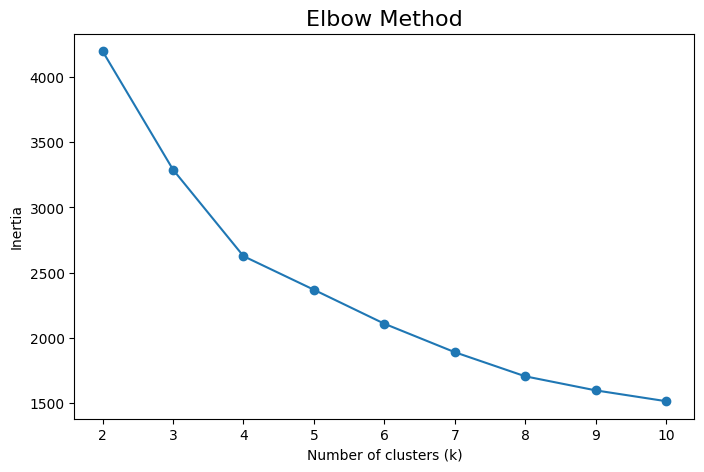

In [ ]:
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    km.fit(df_share1_scaled.iloc[:, 3:])
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method", fontsize = 16)
plt.show()

In [ ]:
# KMeans
X = df_share1_scaled.iloc[:, 3:]

km = KMeans(n_clusters=4, random_state=42, n_init=10)
df_share1_scaled["label_KMeans"] = km.fit_predict(X)

In [ ]:
df_share1_scaled

crime_category,BoroughName,year,population,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON,label_KMeans
0,Barking and Dagenham,2010,185911.0,1.842871,0.003564,-0.388143,1.516821,-0.642222,-0.385764,-1.320422,-0.075104,-1.202970,-0.416619,0.028900,-0.743226,2
1,Barking and Dagenham,2011,185911.0,3.079410,1.406031,-0.068636,2.065690,-0.446208,-0.288028,-1.135105,0.749256,-0.676885,-0.261827,1.246904,-0.389237,2
2,Barking and Dagenham,2012,185911.0,1.420819,1.595298,-0.105151,2.627423,-0.763565,-0.711553,-1.005170,0.178046,-0.738058,-0.287657,0.552608,-0.587033,2
3,Barking and Dagenham,2013,185911.0,1.006171,1.184589,0.154107,-0.202682,-0.138184,-0.841868,-0.760211,-0.276325,-0.560657,-0.343465,0.972256,-0.519155,2
4,Barking and Dagenham,2014,185911.0,1.157961,0.563794,-0.368060,-0.442812,0.309850,-0.939604,-0.364017,-0.341236,-0.150800,-0.364770,-0.307160,0.164739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Westminster,2020,204236.0,1.895316,2.105431,3.432575,-0.442812,0.874501,2.312103,3.612329,2.737953,2.211731,2.445427,2.037550,2.674319,3
476,Westminster,2021,204236.0,2.619873,0.877039,2.970555,-0.442812,0.925480,2.771766,4.228918,2.781282,4.600573,2.620655,1.551515,3.539352,3
477,Westminster,2022,204236.0,2.687273,1.831498,4.025889,-0.442812,1.222859,4.046961,4.612832,4.855207,5.847893,6.360680,2.577934,4.228987,3
478,Westminster,2023,204236.0,3.044497,2.367304,2.643153,-0.442812,1.333315,4.862492,5.266261,6.738086,5.552768,8.598997,3.042230,4.535269,3


In [ ]:
cluster_profile1 = (
    df_share1_scaled.groupby('label_KMeans')[crime_cols].mean())

cluster_profile1

crime_category,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,FRAUD AND FORGERY,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,SEXUAL OFFENCES,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
label_KMeans,,,,,,,,,,,,
0,0.225485,-0.018605,0.214053,-0.439715,0.561485,0.688212,0.691298,0.273678,0.682430,0.085331,0.449776,0.788280
1,-0.726503,-0.554100,-0.673182,-0.334960,-0.424444,-0.706141,-0.414366,-0.680259,-0.422588,-0.412955,-0.595469,-0.545216
2,0.729234,0.822619,0.506820,1.511850,-0.433641,-0.328127,-0.978143,0.333539,-0.909518,-0.013582,0.050079,-0.850047
3,2.312011,2.555353,3.160804,0.653809,1.229122,2.748525,2.885164,3.588182,2.673313,4.629200,1.933154,2.581586


In [ ]:
df_share1_scaled['label_KMeans'].value_counts(normalize=True)

label_KMeans
1    0.400000
0    0.383333
2    0.187500
3    0.029167
Name: proportion, dtype: float64

In [ ]:
#df_share1_scaled.to_csv("crime_rate_cluster.csv", index=False)

----

### 1-3. Clustering based on Economic Index

In [ ]:
# Import monthly data from Dec 2023 to Nov 2025
region_econ = pd.read_csv("region_econ.csv")
region_econ.head(3)

,date,year,month,BoroughName,crime_category,crime_subcategory,crime_count,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,ALCOHOLIC BEVERAGES AND TOBACCO,...,MISCELLANEOUS GOODS AND SERVICES,earnings,active_enterprises,births,birth_rate,deaths,death_rate,Rate,unemployment_rate,population
0,2010-04-01,2010,4,Barking and Dagenham,ARSON AND CRIMINAL DAMAGE,ARSON,6,89.886,90.362,77.143,...,94.064,429.3,4190.0,635.0,15.2,585.0,14.0,0.5,13.1,185911.0
1,2010-04-01,2010,4,Barking and Dagenham,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,208,89.886,90.362,77.143,...,94.064,429.3,4190.0,635.0,15.2,585.0,14.0,0.5,13.1,185911.0
2,2010-04-01,2010,4,Barking and Dagenham,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,49,89.886,90.362,77.143,...,94.064,429.3,4190.0,635.0,15.2,585.0,14.0,0.5,13.1,185911.0


In [ ]:
corr_matrix = region_econ.iloc[:, 3:].corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify variables with a high correlation (above 0.7)
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(f"Removed variable: {to_drop}")

# Drop highly correlated variables from the dataset
df_dropped = region_econ.drop(columns=to_drop)

print(f"Number of remaining variables after removal : {len(df_dropped.columns[3:])}")

제거될 변수들: ['ALCOHOLIC BEVERAGES AND TOBACCO', 'CLOTHING AND FOOTWEAR', 'HOUSING, WATER, ELELCTRICITY, GAS AND OTHER FUELS', 'FURNITURE, HOUSEHOLD EQUIPMENT AND MAINTENANCE', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION & CULTURE', 'EDUCATION', 'RESTAURANTS AND HOTELS', 'MISCELLANEOUS GOODS AND SERVICES']
제거 후 남은 변수 개수: 5


In [ ]:
df_dropped

,year,BoroughName,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,birth_rate,death_rate,Rate,unemployment_rate
0,2010,Barking and Dagenham,0.210736,0.213113,15.2,14.0,0.116469,13.1
1,2010,Barnet,0.180360,0.182395,11.8,13.5,0.099681,7.0
2,2010,Bexley,0.174616,0.176586,11.7,11.8,0.096506,8.5
3,2010,Brent,0.213824,0.216236,12.9,11.2,0.118175,8.9
4,2010,Bromley,0.171602,0.173538,11.4,10.9,0.094841,6.9
...,...,...,...,...,...,...,...,...
411,2022,Sutton,0.208657,0.200513,11.1,12.7,0.267048,3.0
412,2022,Tower Hamlets,0.166103,0.159620,13.5,13.5,0.212585,4.6
413,2022,Waltham Forest,0.186179,0.178912,14.7,14.7,0.238279,5.9
414,2022,Wandsworth,0.144123,0.138497,11.2,13.1,0.184454,2.5


In [ ]:
scaler = StandardScaler()

# Exclude categorical variables
columns_to_exclude = ['BoroughName', 'year']
columns_to_scale = df_dropped.columns.difference(columns_to_exclude)
df_dropped_scaled = df_dropped.copy()
df_dropped_scaled[columns_to_scale] = scaler.fit_transform(df_dropped_scaled[columns_to_scale])
df_dropped_scaled.head()

,FOOD AND NON-ALCOHOLIC BEVERAGES,birth_rate,death_rate,Rate,unemployment_rate
FOOD AND NON-ALCOHOLIC BEVERAGES,1.000000,0.467129,0.234308,0.267843,0.411789
birth_rate,0.467129,1.000000,0.138251,-0.016462,0.343323
death_rate,0.234308,0.138251,1.000000,0.209951,-0.041826
Rate,0.267843,-0.016462,0.209951,1.000000,-0.070201
unemployment_rate,0.411789,0.343323,-0.041826,-0.070201,1.000000


In [ ]:
corr = df_dropped_scaled.iloc[:, 3:].corr()
red_green_cmap = sns.diverging_palette(10, 130, s=90, l=55, center='light', as_cmap=True)
masking = np.triu(np.ones_like(corr, dtype=bool), k=1)
plt.figure(figsize=(12, 10))
plt.tight_layout()
plt.title("Correlation of crime composition")
sns.heatmap(
    data=corr,
    mask=masking,
    vmin=-1,
    vmax=1,
    cmap=red_green_cmap,  # Use our custom colormap
    center=0,             # Anchor the colormap at 0 (making it white)
    annot=True,           # Show the values in the cells
    fmt=".2f",            # Format the values to one decimal place
    linewidths=.5,        # Add thin lines between cells
    cbar_kws={"label": "Value"} # Label for the color bar
)
plt.show()

,year,BoroughName,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,birth_rate,death_rate,Rate,unemployment_rate
0,2010,Barking and Dagenham,1.126853,1.270995,-0.099829,1.499994,0.418609,2.911432
1,2010,Barnet,-0.188489,-0.007790,-1.188484,1.180552,0.100001,0.194738
2,2010,Bexley,-0.437221,-0.249610,-1.220504,0.094450,0.039753,0.862777
3,2010,Brent,1.260576,1.401002,-0.836272,-0.288880,0.451000,1.040921
4,2010,Bromley,-0.567739,-0.376501,-1.316561,-0.480545,0.008138,0.150202
...,...,...,...,...,...,...,...,...
411,2022,Sutton,1.036843,0.746448,-1.412619,0.669445,3.276398,-1.586701
412,2022,Tower Hamlets,-0.805894,-0.955944,-0.644157,1.180552,2.242769,-0.874126
413,2022,Waltham Forest,0.063465,-0.152796,-0.259926,1.947212,2.730410,-0.295158
414,2022,Wandsworth,-1.757702,-1.835261,-1.380600,0.924999,1.708880,-1.809381


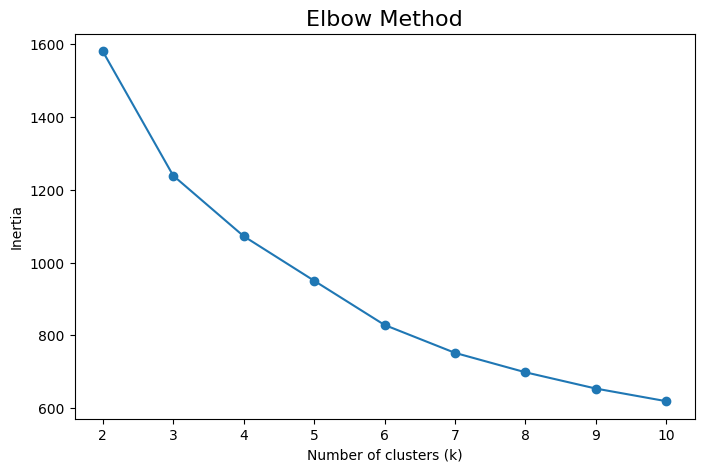

In [ ]:
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    km.fit(df_dropped_scaled.iloc[:, 3:])
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method", fontsize = 16)
plt.show()

In [ ]:
X = df_dropped_scaled.iloc[:, 2:]

km = KMeans(n_clusters=3, random_state=42, n_init=10)
df_dropped_scaled["label_KMeans"] = km.fit_predict(X)

,year,BoroughName,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,birth_rate,death_rate,Rate,unemployment_rate,label_KMeans
0,2010,Barking and Dagenham,1.126853,1.270995,-0.099829,1.499994,0.418609,2.911432,0
1,2010,Barnet,-0.188489,-0.007790,-1.188484,1.180552,0.100001,0.194738,1
2,2010,Bexley,-0.437221,-0.249610,-1.220504,0.094450,0.039753,0.862777,1
3,2010,Brent,1.260576,1.401002,-0.836272,-0.288880,0.451000,1.040921,0
4,2010,Bromley,-0.567739,-0.376501,-1.316561,-0.480545,0.008138,0.150202,1
...,...,...,...,...,...,...,...,...,...
411,2022,Sutton,1.036843,0.746448,-1.412619,0.669445,3.276398,-1.586701,2
412,2022,Tower Hamlets,-0.805894,-0.955944,-0.644157,1.180552,2.242769,-0.874126,2
413,2022,Waltham Forest,0.063465,-0.152796,-0.259926,1.947212,2.730410,-0.295158,2
414,2022,Wandsworth,-1.757702,-1.835261,-1.380600,0.924999,1.708880,-1.809381,2


In [ ]:
df_dropped_scaled["label_KMeans"].value_counts(normalize=True)

label_KMeans
0    0.543269
1    0.377404
2    0.079327
Name: proportion, dtype: float64

In [ ]:
cluster_profile2 = (
    df_dropped_scaled.iloc[:, 2:].groupby('label_KMeans').mean())

cluster_profile2

,CPIH ALL ITEMS,FOOD AND NON-ALCOHOLIC BEVERAGES,birth_rate,death_rate,Rate,unemployment_rate
label_KMeans,,,,,,
0,0.610182,0.651275,0.456966,0.091906,-0.025249,0.373079
1,-0.912614,-0.924567,-0.502619,-0.376777,-0.534589,-0.330900
2,0.163007,-0.061549,-0.738274,1.163128,2.716264,-0.980742


In [ ]:
#df_dropped_scaled.to_csv("economy_index_cluster.csv", index = False)

---

## 2. Relationship between CPIH and Crime (Statistical Anaysis)

In [ ]:
# Data filtering (Borough / Crime)
crime_econ = pd.read_csv 
crime_econ = crime_econ[(crime_econ['crime_category'] == 'THEFT') & (crime_econ['BoroughName'] == 'Westminster')]

In [ ]:
# Groupby date, sum of crime_count
monthly_summary = crime_econ.groupby('date').agg({
    'crime_count': 'sum',     
    'CPIH ALL ITEMS': 'first', 
}).reset_index()

monthly_summary

In [ ]:
# Pearson correlation
correlation, p_value = pearsonr(monthly_summary['CPIH ALL ITEMS'], monthly_summary['crime_count'])

print(f"CPIH 와 crime_count의 상관계수: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

In [ ]:
# Calculate month-on-month percentage change
monthly_summary['cpi_growth'] = monthly_summary['CPIH ALL ITEMS'].pct_change()
monthly_summary['crime_growth'] = monthly_summary['crime_count'].pct_change()

# Drop the first row (NaN) caused by the absence of a previous observation
growth_data = monthly_summary.dropna()
corr_growth, p_growth = pearsonr(growth_data['cpi_growth'], growth_data['crime_growth'])

print(f"Correlation coefficient between CPIH growth and crime growth: {corr_growth:.4f}", f"P-value: {p_growth:.4f}")

In [ ]:
# 1-month lag: previous month's CPIH growth vs current month's crime growth
corr_lag1, p_lag1 = pearsonr(growth_data['cpi_growth'].shift(1).dropna(), 
                             growth_data['crime_growth'].iloc[1:])

# 2-month lag: CPIH growth from two months earlier vs current month's crime growth
corr_lag2, p_lag2 = pearsonr(growth_data['cpi_growth'].shift(2).dropna(), 
                             growth_data['crime_growth'].iloc[2:])

# 6-month lag
corr_lag6, p_lag6 = pearsonr(growth_data['cpi_growth'].shift(6).dropna(), 
                             growth_data['crime_growth'].iloc[6:])

# 12-month lag
corr_lag12, p_lag12 = pearsonr(growth_data['cpi_growth'].shift(12).dropna(), 
                             growth_data['crime_growth'].iloc[12:])

# 18-month lag
corr_lag18, p_lag18 = pearsonr(growth_data['cpi_growth'].shift(18).dropna(), 
                             growth_data['crime_growth'].iloc[18:])

print(f"1-month lag correlation: {corr_lag1:.4f} (p-value: {p_lag1:.4f})")
print(f"2-month lag correlation: {corr_lag2:.4f} (p-value: {p_lag2:.4f})")
print(f"6-month lag correlation: {corr_lag6:.4f} (p-value: {p_lag6:.4f})")
print(f"12-month lag correlation: {corr_lag12:.4f} (p-value: {p_lag12:.4f})")
print(f"18-month lag correlation: {corr_lag18:.4f} (p-value: {p_lag18:.4f})")

In [ ]:
# Calculate year-on-year (YoY) percentage change
monthly_summary['CPIH ALL ITEMS_yoy'] = monthly_summary['CPIH ALL ITEMS'].pct_change(12)
monthly_summary['crime_growth_yoy'] = monthly_summary['crime_count'].pct_change(12)

# Drop the first row (NaN)
yoy_data = monthly_summary.dropna()
corr_yoy, p_yoy = pearsonr(yoy_data['CPIH ALL ITEMS_yoy'], yoy_data['crime_growth_yoy'])

print(f"전체 물가 상승률(YoY)과 전체 crime 증가율(YoY) 상관계수: {corr_yoy:.4f}")
print(f"P-value: {p_yoy:.4f}")

In [ ]:
# OLS regression of year-on-year crime growth on year-on-year CPIH growth
df = yoy_data.copy()

df_model = df.dropna(subset=['CPIH ALL ITEMS_yoy', 'crime_growth_yoy'])

X = sm.add_constant(df_model['CPIH ALL ITEMS_yoy'])
y = df_model['crime_growth_yoy']

model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
# Draw graph
x_var = 'CPIH ALL ITEMS_yoy'
y_var = 'crime_growth_yoy'

df_plot = df_model[[x_var, y_var]].dropna()

X = df_plot[x_var]
Y = df_plot[y_var]

# Pearson correlation
r, p = pearsonr(X, Y)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.8, s=30)

# Regression line
m, c = np.polyfit(X, Y, 1)
plt.plot(X, m * X + c, color='red', linestyle='--', label='Regression Line')

plt.xlabel('CPHI Growth (Year-on-Year)')
plt.ylabel('Theft Crime Growth (Year-on-Year)')
plt.title(f'Relationship Between CPHI Growth and Theft Crime Growth (YoY) in Westminster')

# Annotation box
plt.text(
    0.95, 0.05,
    f"Pearson's r = {r:.2f}",
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)

plt.grid(True)
plt.show()